Printing the columns, datatypes and the count of non-null values to check for missing data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AmesHousing.csv', sep='\t')
pd.set_option('display.max_columns', None)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Alley has numerous NaN values, but their meaning is possible

In [16]:
print(df['Alley'].value_counts(dropna=False))

Alley
NaN     2732
Grvl     120
Pave      78
Name: count, dtype: int64


Lot Frontage only has 2440 non-null values to the possible 2930. I am checkin to see if nan could be replaced with 0

In [17]:
print((df['Lot Frontage'] == 0).value_counts())

Lot Frontage
False    2930
Name: count, dtype: int64


Electrical has a nan value in the dataset. Checking the values we cannot be sure about the value that it be replaced with. 

In [18]:
print(df['Electrical'].value_counts(dropna=False))

Electrical
SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
NaN         1
Mix         1
Name: count, dtype: int64


Checking for null values, but they can be considered as not having a basement

In [19]:
print(df['Bsmt Qual'].value_counts(dropna=False))

Bsmt Qual
TA     1283
Gd     1219
Ex      258
Fa       88
NaN      80
Po        2
Name: count, dtype: int64


In [20]:
print(df['Mas Vnr Type'].value_counts(dropna=False))
print(df['Mas Vnr Area'].value_counts(dropna=False))

Mas Vnr Type
NaN        1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64
Mas Vnr Area
0.0      1748
NaN        23
120.0      15
176.0      13
200.0      13
         ... 
291.0       1
31.0        1
630.0       1
382.0       1
579.0       1
Name: count, Length: 446, dtype: int64


The total amount of houses that do not have a Msr Vnr type selected(1775) is higher than the total amount of houses that have a value of 0 or NaN(1771). 

In [21]:
print(df[df['Mas Vnr Type'].isnull() & ((df['Mas Vnr Area'] != 0) | df['Mas Vnr Area'].isnull())].to_string())


      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type Sale Condition  SalePrice


There are multiple rows where these types of values do not match. I will replace the values of the area with 0 whereever mas vnr type is nan


In [22]:
df.loc[df['Mas Vnr Type'].isnull(), 'Mas Vnr Area'] = 0
df.loc[df['Mas Vnr Area'].isnull(), 'Mas Vnr Type'] = np.nan
df.loc[df['Mas Vnr Area'] == 0, 'Mas Vnr Type'] = np.nan
print(df['Mas Vnr Type'].value_counts(dropna=False))
print(df['Mas Vnr Area'].value_counts(dropna=False))


Mas Vnr Type
NaN        1778
BrkFace     878
Stone       248
BrkCmn       25
CBlock        1
Name: count, dtype: int64
Mas Vnr Area
0.0      1778
120.0      15
176.0      13
200.0      13
180.0      12
         ... 
408.0       1
443.0       1
297.0       1
370.0       1
385.0       1
Name: count, Length: 444, dtype: int64


Now I will validate the years of remodeling vs the years of building

In [23]:
print(df[df['Year Built'] > df['Year Remod/Add']].to_string())


     Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type Sale Condition  SalePrice
8

There is one value that does not fit the criteria. I will change this by setting the remod/add date to the built date

In [24]:
df.loc[df['Year Built'] > df['Year Remod/Add'], 'Year Remod/Add'] = df['Year Built']

In [25]:
for column in df.columns:
    na_count = df[column].isnull().sum()
    zero_count = (df[column] == 0).sum()
    print(f"Column: {column}, NaN count: {na_count}, '0' count: {zero_count}")


Column: Order, NaN count: 0, '0' count: 0
Column: PID, NaN count: 0, '0' count: 0
Column: MS SubClass, NaN count: 0, '0' count: 0
Column: MS Zoning, NaN count: 0, '0' count: 0
Column: Lot Frontage, NaN count: 490, '0' count: 0
Column: Lot Area, NaN count: 0, '0' count: 0
Column: Street, NaN count: 0, '0' count: 0
Column: Alley, NaN count: 2732, '0' count: 0
Column: Lot Shape, NaN count: 0, '0' count: 0
Column: Land Contour, NaN count: 0, '0' count: 0
Column: Utilities, NaN count: 0, '0' count: 0
Column: Lot Config, NaN count: 0, '0' count: 0
Column: Land Slope, NaN count: 0, '0' count: 0
Column: Neighborhood, NaN count: 0, '0' count: 0
Column: Condition 1, NaN count: 0, '0' count: 0
Column: Condition 2, NaN count: 0, '0' count: 0
Column: Bldg Type, NaN count: 0, '0' count: 0
Column: House Style, NaN count: 0, '0' count: 0
Column: Overall Qual, NaN count: 0, '0' count: 0
Column: Overall Cond, NaN count: 0, '0' count: 0
Column: Year Built, NaN count: 0, '0' count: 0
Column: Year Remod/Ad

In [26]:
for i in df.columns:
    print(i," has " ,df[i].nunique(), " unique values")



Order  has  2930  unique values
PID  has  2930  unique values
MS SubClass  has  16  unique values
MS Zoning  has  7  unique values
Lot Frontage  has  128  unique values
Lot Area  has  1960  unique values
Street  has  2  unique values
Alley  has  2  unique values
Lot Shape  has  4  unique values
Land Contour  has  4  unique values
Utilities  has  3  unique values
Lot Config  has  5  unique values
Land Slope  has  3  unique values
Neighborhood  has  28  unique values
Condition 1  has  9  unique values
Condition 2  has  8  unique values
Bldg Type  has  5  unique values
House Style  has  8  unique values
Overall Qual  has  10  unique values
Overall Cond  has  9  unique values
Year Built  has  118  unique values
Year Remod/Add  has  61  unique values
Roof Style  has  6  unique values
Roof Matl  has  8  unique values
Exterior 1st  has  16  unique values
Exterior 2nd  has  17  unique values
Mas Vnr Type  has  4  unique values
Mas Vnr Area  has  444  unique values
Exter Qual  has  4  unique va

  has  103  unique values
Garage Finish  has  3  unique values
Garage Cars  has  6  unique values
Garage Area  has  603  unique values
Garage Qual  has  5  unique values
Garage Cond  has  5  unique values
Paved Drive  has  3  unique values
Wood Deck SF  has  380  unique values
Open Porch SF  has  252  unique values
Enclosed Porch  has  183  unique values
3Ssn Porch  has  31  unique values
Screen Porch  has  121  unique values
Pool Area  has  14  unique values
Pool QC  has  4  unique values
Fence  has  4  unique values
Misc Feature  has  5  unique values
Misc Val  has  38  unique values
Mo Sold  has  12  unique values
Yr Sold  has  5  unique values
Sale Type  has  10  unique values
Sale Condition  has  6  unique values
SalePrice  has  1032  unique values


I added all the non-continous values into an array and created bar charts based on the average sale price by grouping them. Later I only chose the columns that seemed to be relevant to show in the bar graphs

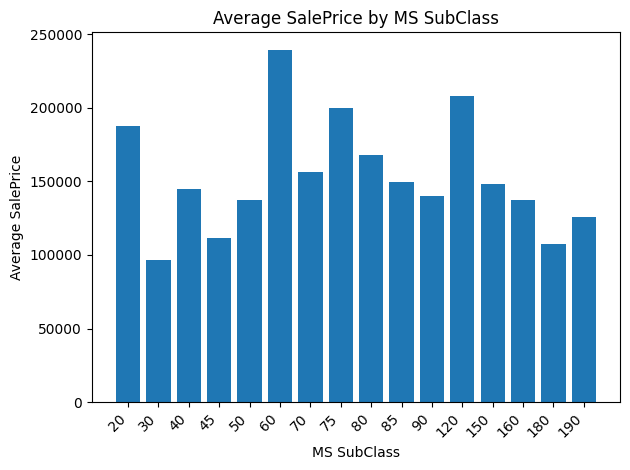

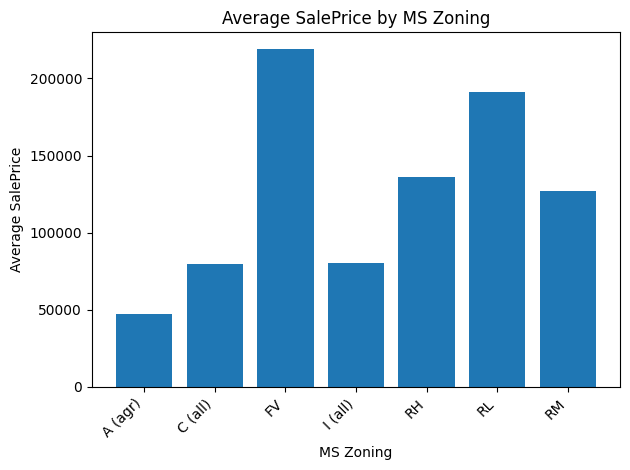

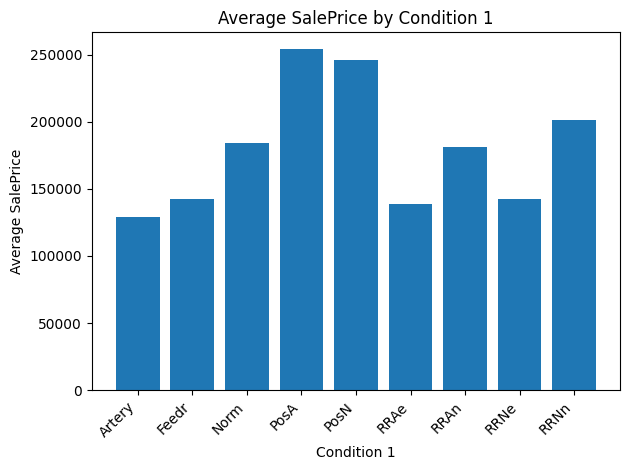

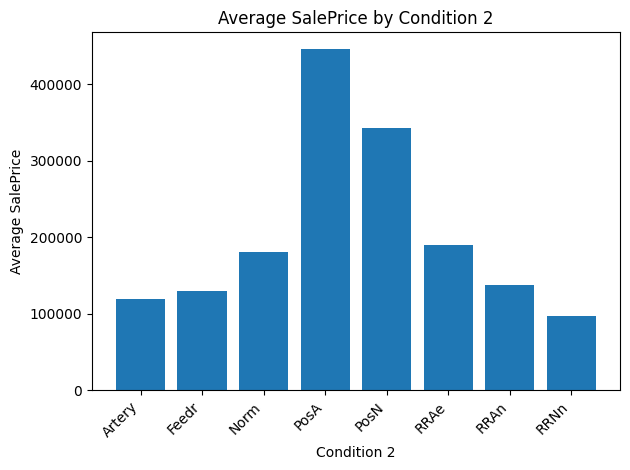

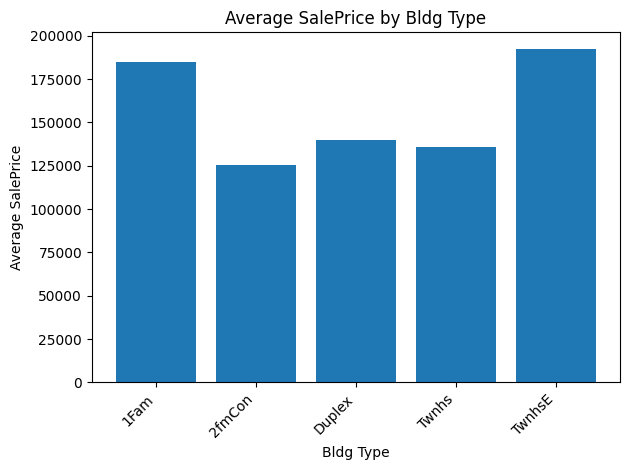

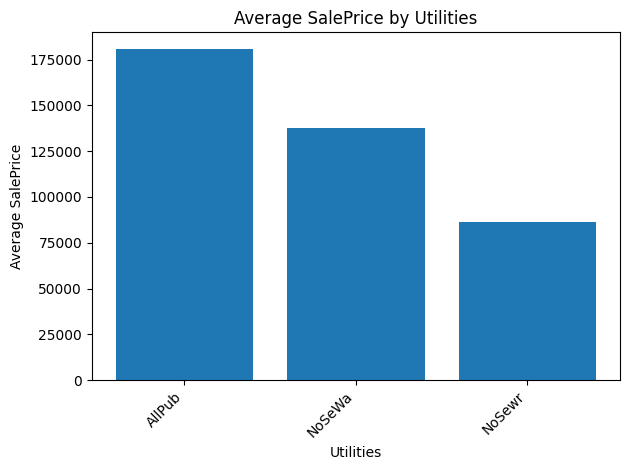

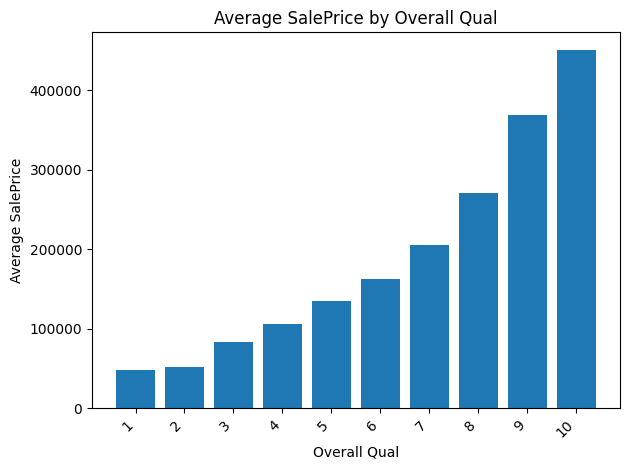

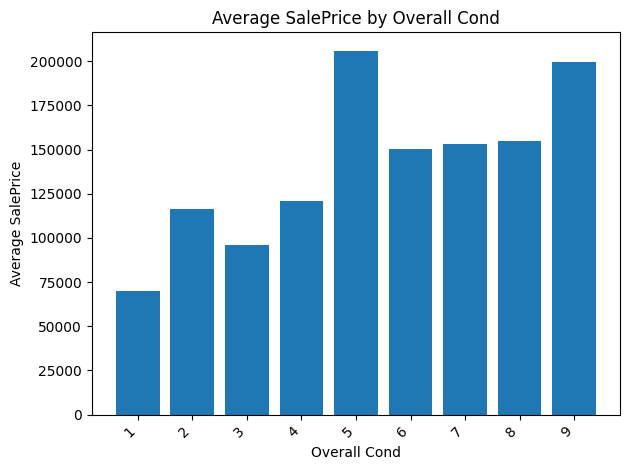

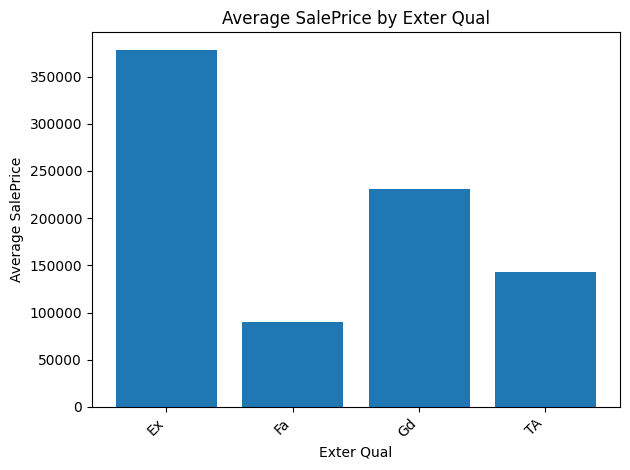

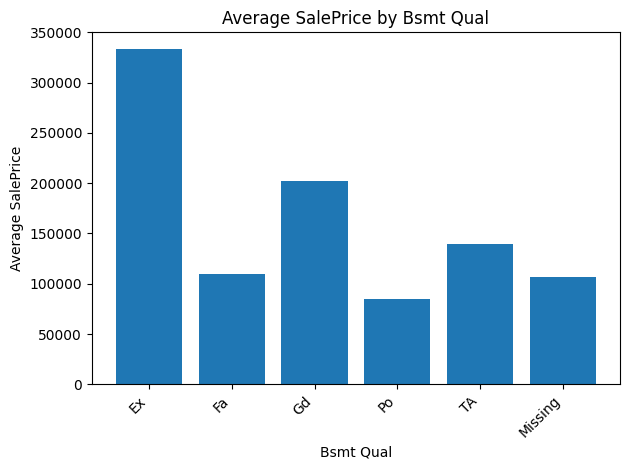

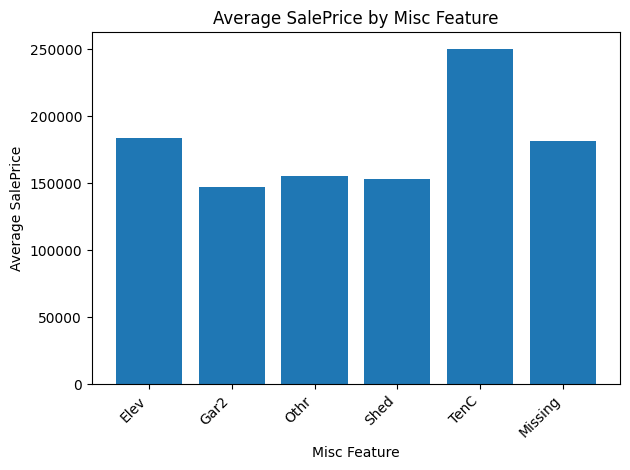

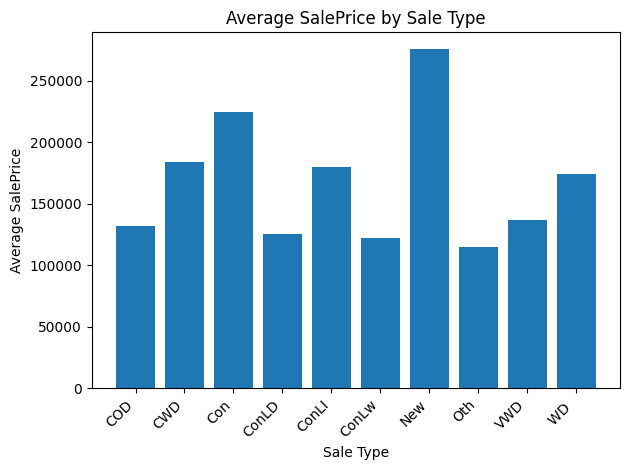

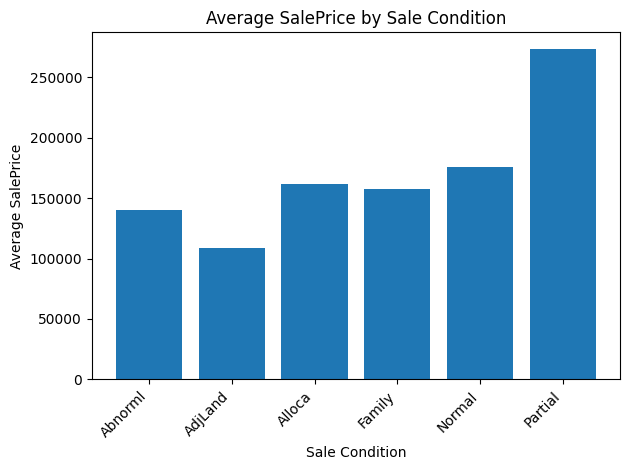

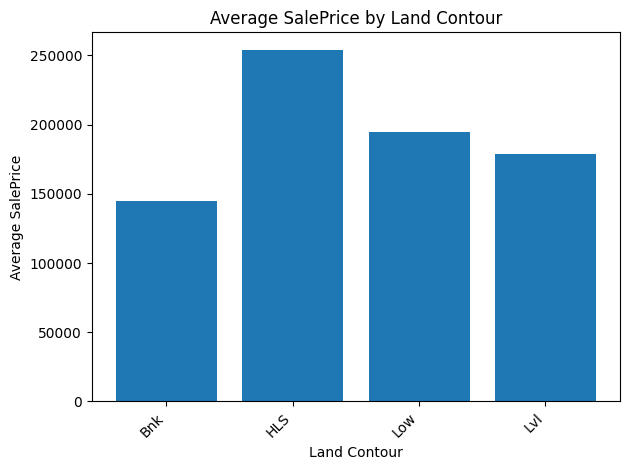

In [28]:
nominal_columns = [
    "MS SubClass", "MS Zoning", "Street", "Alley", "", "Utilities", 
    "Lot Config", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", 
    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", 
    "Heating", "Central Air", "Electrical", "Garage Type", "Garage Finish", 
    "Garage Qual", "Garage Cond", "Paved Drive", "Pool QC", "Fence", "Misc Feature", 
    "Sale Type", "Sale Condition"
]

ordinal_columns = [
    "Lot Shape", "Land Slope", "Overall Qual", "Overall Cond", "Exter Qual", "Exter Cond", 
    "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", 
    "Heating QC", "Kitchen Qual", "Functional", "Fireplace Qu"
]

discrete_columns = [
    "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", 
    "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd",
    "Fireplaces", "Garage Cars", "Yr Sold"
]



categorical_columns = nominal_columns + ordinal_columns + discrete_columns
relevant_columns = ['MS SubClass', 'MS Zoning', 'Condition 1', 'Condition 2', 'Bldg Type', 'Utilities',
                    'Overall Qual', 'Overall Cond', 'Exter Qual', 'Bsmt Qual','Misc Feature', 'Sale Type', 'Sale Condition', 'Land Contour']

for column in relevant_columns:
    average_price = df.groupby(column, dropna=False)['SalePrice'].mean().reset_index()
    average_price[column] = average_price[column].astype(str).replace('nan', 'Missing')
    plt.bar(average_price[column].astype(str), average_price['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('Average SalePrice')
    plt.title(f"Average SalePrice by {column}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
print(df[df['Overall Cond'] == 5]['SalePrice'].describe())

count      1654.000000
mean     206027.027207
std       87026.460929
min       13100.000000
25%      145025.000000
50%      187000.000000
75%      245262.500000
max      745000.000000
Name: SalePrice, dtype: float64


Plotted Box Graphs to find outliers in the continous columns

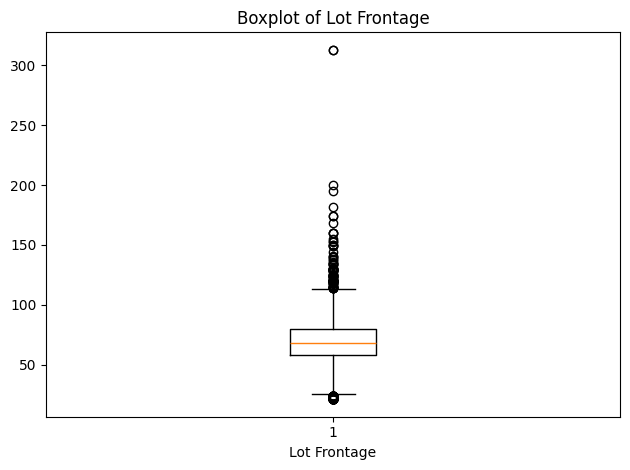

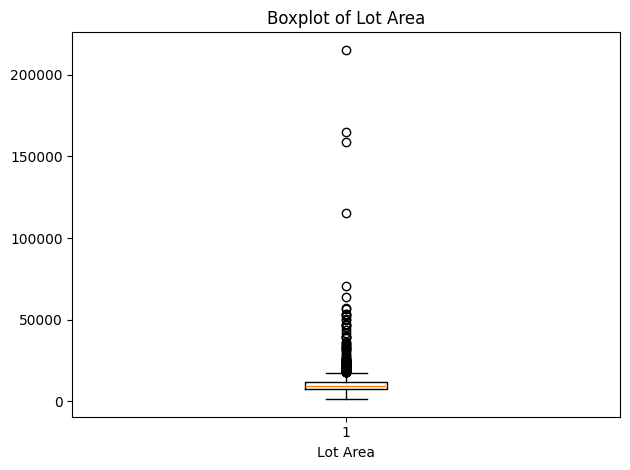

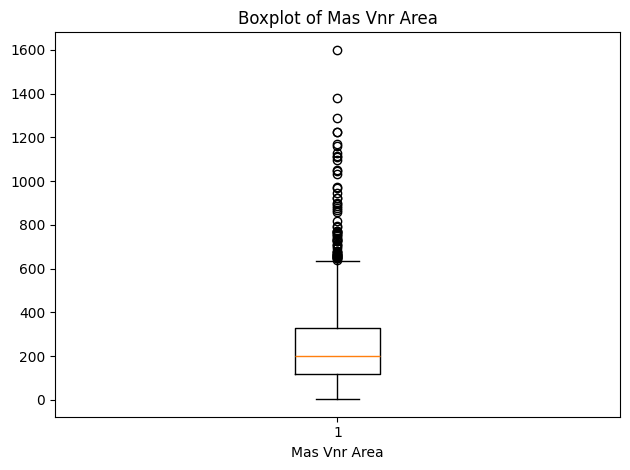

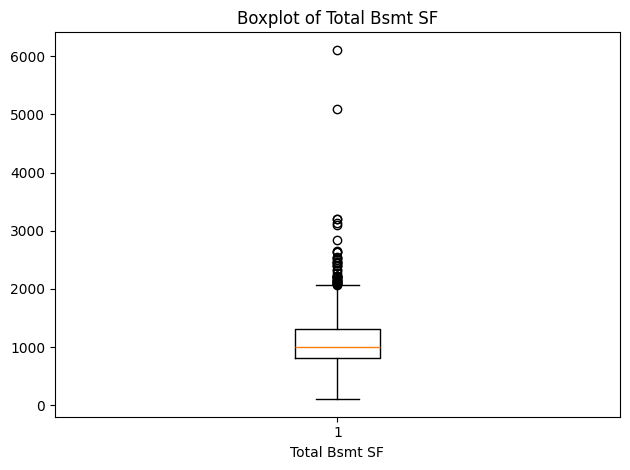

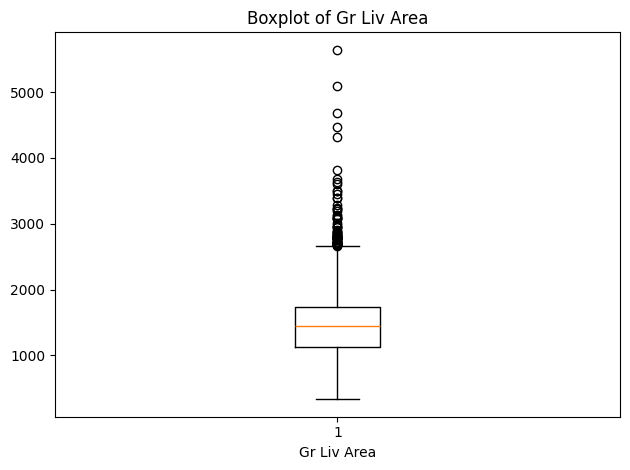

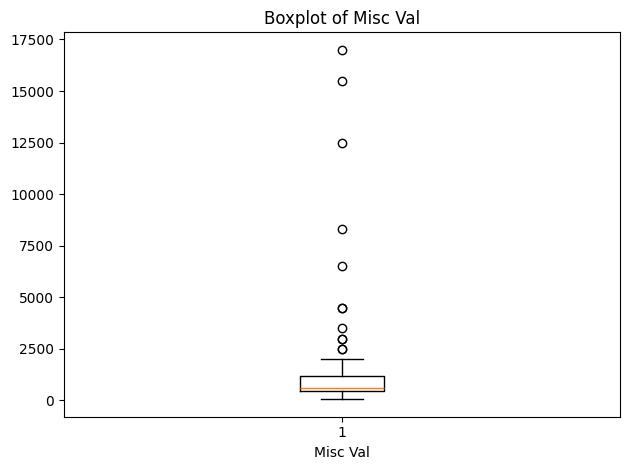

In [ ]:
columns_to_exclude = categorical_columns + ['Mo Sold','SalePrice', 'Order', 'PID']
continous_columns = [col for col in df.columns if col not in categorical_columns and col not in columns_to_exclude]

relevant_columns = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Misc Val']
for column in relevant_columns:
    current_column = df[column].replace(0, np.nan)
    plt.boxplot(current_column.dropna())
    plt.xlabel(column)
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()

Multiple columns that represented the fireplace, garage, pool, porch and Basement have been dropped and replaced by boolean values that represente the existence of those objects.

The total square feet feature has also been added to the dataset alongside the TotalBath and TotalPorchSF. 

Positive_Off_Site represents the proximity to a postive off-site feature. These seemed to add value to the houses that are being sold. 

In [ ]:
new_df = df.assign(hasBasement = df['Total Bsmt SF'] > 0)
new_df = new_df.assign(hasGarage = df['Garage Area'] > 0)
new_df = new_df.assign(hasFireplace = df['Fireplaces'] > 0)
new_df = new_df.assign(hasPool = df['Pool Area'] > 0)
new_df = new_df.assign(TotalSF = (df['Total Bsmt SF'].fillna(0) + df['Gr Liv Area'].fillna(0)))
new_df = new_df.assign(TotalBath = (df['Bsmt Full Bath'].fillna(0) + 0.5 * df['Bsmt Half Bath'].fillna(0) + 
                                    df['Full Bath'].fillna(0) + 0.5 * df['Half Bath'].fillna(0)))
new_df = new_df.assign(TotalPorchSF = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch'])
new_df = new_df.assign(Positive_Off_Site = (df['Condition 2'] == 'PosN') | (df['Condition 2'] == 'PosA'))
new_df = new_df.assign(hasFence = df['Fence'].notnull())
new_df.drop(columns=['Total Bsmt SF', 'Fireplaces',
                      'Pool Area', 'Bsmt Exposure', 'Bsmt Half Bath',
                        'Bsmt Full Bath', 'BsmtFin Type 1', 'BsmtFin Type 2',
                          'Bsmt Exposure', 'Lot Config', 'Condition 2',
                            'Garage Type', 'Garage Finish', 'Garage Qual',
                              'Pool QC', 'Fence', 'Lot Shape', 'Land Slope',
                                'Fireplace Qu', 'Yr Sold',
                                  'Mo Sold', 'Order', '1st Flr SF', '2nd Flr SF'
                                  , 'Garage Yr Blt', 'Garage Cond', 'Wood Deck SF'
                                  , 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
                                  'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Low Qual Fin SF']
                                    ,inplace=True)
new_df = new_df[new_df['Electrical'].notnull()]


print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2929 entries, 0 to 2929
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PID                2929 non-null   int64  
 1   MS SubClass        2929 non-null   int64  
 2   MS Zoning          2929 non-null   object 
 3   Lot Frontage       2439 non-null   float64
 4   Lot Area           2929 non-null   int64  
 5   Street             2929 non-null   object 
 6   Alley              198 non-null    object 
 7   Land Contour       2929 non-null   object 
 8   Utilities          2929 non-null   object 
 9   Neighborhood       2929 non-null   object 
 10  Condition 1        2929 non-null   object 
 11  Bldg Type          2929 non-null   object 
 12  House Style        2929 non-null   object 
 13  Overall Qual       2929 non-null   int64  
 14  Overall Cond       2929 non-null   int64  
 15  Year Built         2929 non-null   int64  
 16  Year Remod/Add     2929 non-n

In [ ]:
print(new_df['TotalBath'].value_counts(dropna=False))

TotalBath
2.0    911
2.5    559
1.0    443
3.0    378
1.5    293
3.5    289
4.0     31
4.5     17
5.0      3
7.0      3
6.0      2
Name: count, dtype: int64


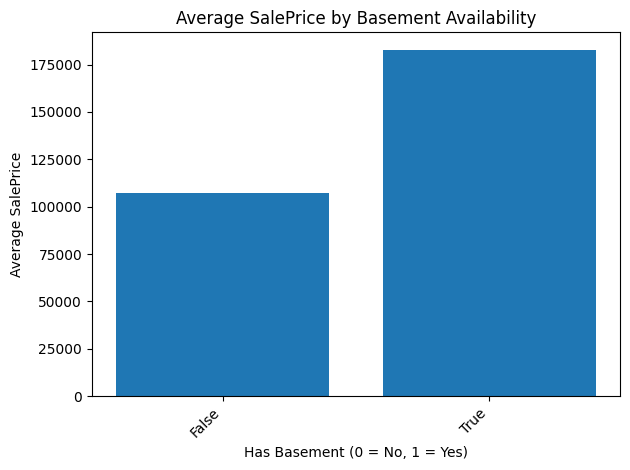

In [ ]:
bsmt_avg_price = new_df.groupby('hasBasement')['SalePrice'].mean().reset_index()
bsmt_avg_price = bsmt_avg_price.sort_values(by='SalePrice', ascending=True)


plt.bar(bsmt_avg_price['hasBasement'].astype(str), bsmt_avg_price['SalePrice'])
plt.xlabel('Has Basement (0 = No, 1 = Yes)')
plt.ylabel('Average SalePrice')
plt.title("Average SalePrice by Basement Availability")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

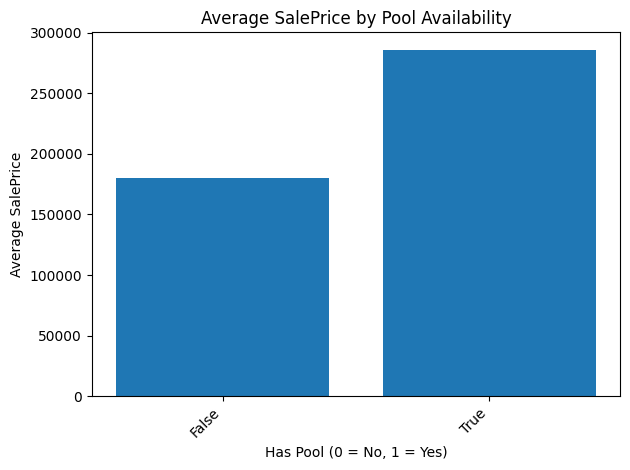

In [ ]:
bsmt_avg_price = new_df.groupby('hasPool')['SalePrice'].mean().reset_index()
bsmt_avg_price = bsmt_avg_price.sort_values(by='SalePrice', ascending=True)


plt.bar(bsmt_avg_price['hasPool'].astype(str), bsmt_avg_price['SalePrice'])
plt.xlabel('Has Pool (0 = No, 1 = Yes)')
plt.ylabel('Average SalePrice')
plt.title("Average SalePrice by Pool Availability")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

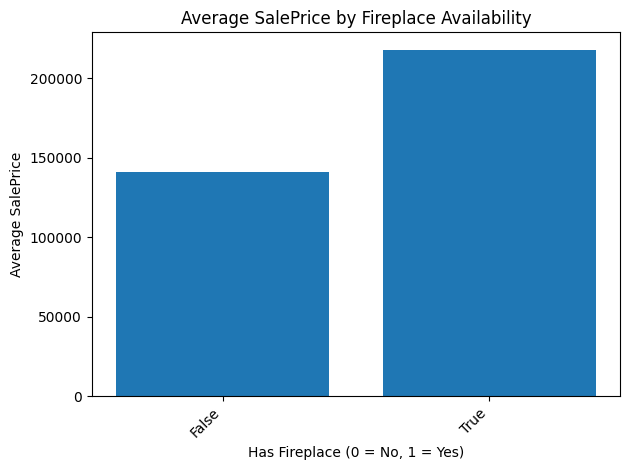

In [ ]:
bsmt_avg_price = new_df.groupby('hasFireplace')['SalePrice'].mean().reset_index()
bsmt_avg_price = bsmt_avg_price.sort_values(by='SalePrice', ascending=True)


plt.bar(bsmt_avg_price['hasFireplace'].astype(str), bsmt_avg_price['SalePrice'])
plt.xlabel('Has Fireplace (0 = No, 1 = Yes)')
plt.ylabel('Average SalePrice')
plt.title("Average SalePrice by Fireplace Availability")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top correlated numeric features with SalePrice:


SalePrice         1.000000
Overall Qual      0.799304
TotalSF           0.790146
Gr Liv Area       0.706777
Garage Cars       0.647908
Garage Area       0.640397
TotalBath         0.636211
Year Built        0.558619
Full Bath         0.545708
Year Remod/Add    0.533144
Mas Vnr Area      0.501733
TotRms AbvGrd     0.495507
Lot Frontage      0.357331
Half Bath         0.285202
Lot Area          0.266548
Name: SalePrice, dtype: float64

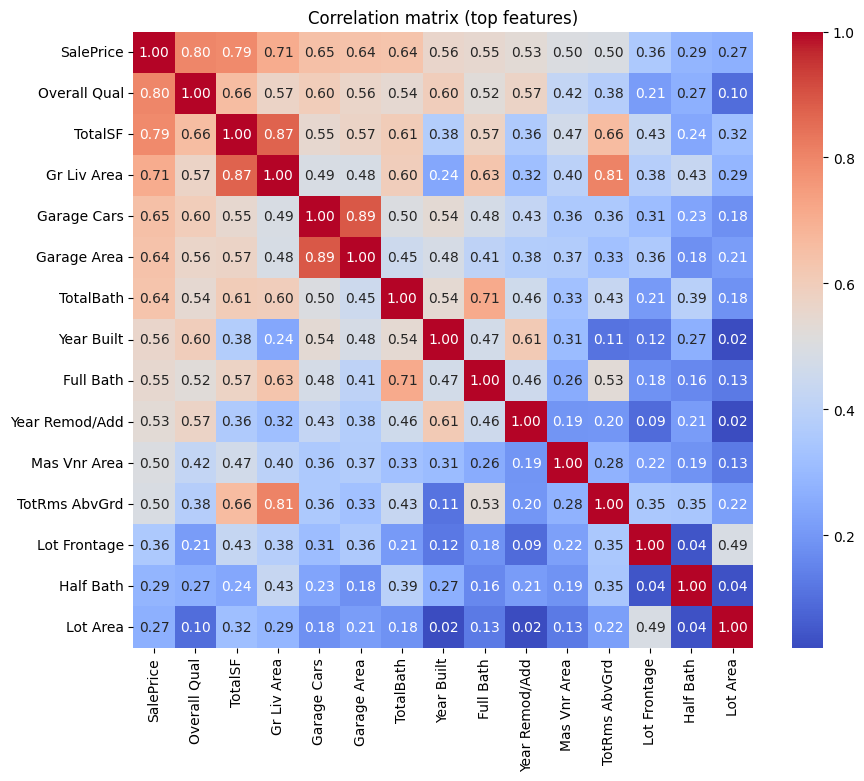

In [ ]:
import seaborn as sns
num = new_df.select_dtypes(include=[np.number])
corr = num.corr()['SalePrice'].abs().sort_values(ascending=False).head(15)
print('Top correlated numeric features with SalePrice:')
display(corr)
plt.figure(figsize=(10,8))
sns.heatmap(num[corr.index].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix (top features)')
plt.show()


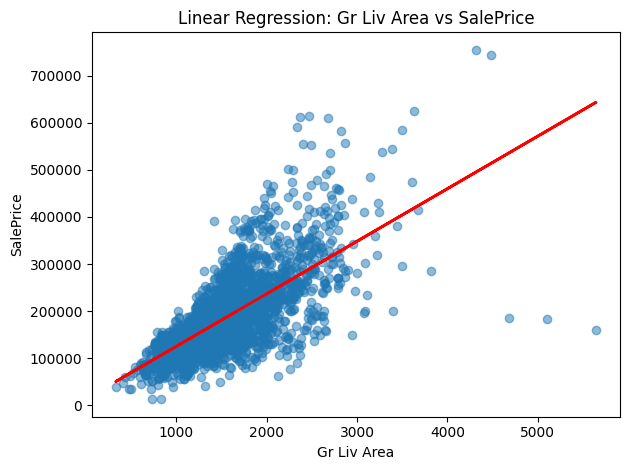

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x_col = 'Gr Liv Area'
y_col = 'SalePrice'

data = new_df[[x_col, y_col]].dropna()

X = data[[x_col]]
y = data[y_col]

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title(f"Linear Regression: {x_col} vs {y_col}")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.tight_layout()
plt.show()

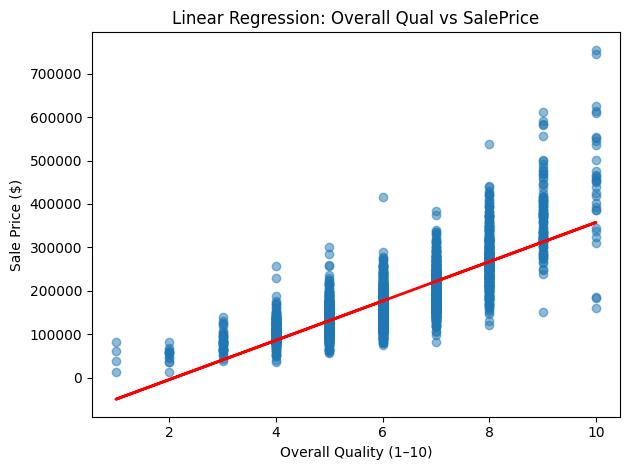

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x_col = 'Overall Qual'
y_col = 'SalePrice'

data = new_df[[x_col, y_col]].dropna()

X = data[[x_col]]
y = data[y_col]

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title(f"Linear Regression: {x_col} vs {y_col}")
plt.xlabel("Overall Quality (1–10)")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()


=== TotalSF vs SalePrice ===
Feature value (TotalSF): 2736.0
Actual SalePrice: $215,000.00
Predicted SalePrice: $195,288.12


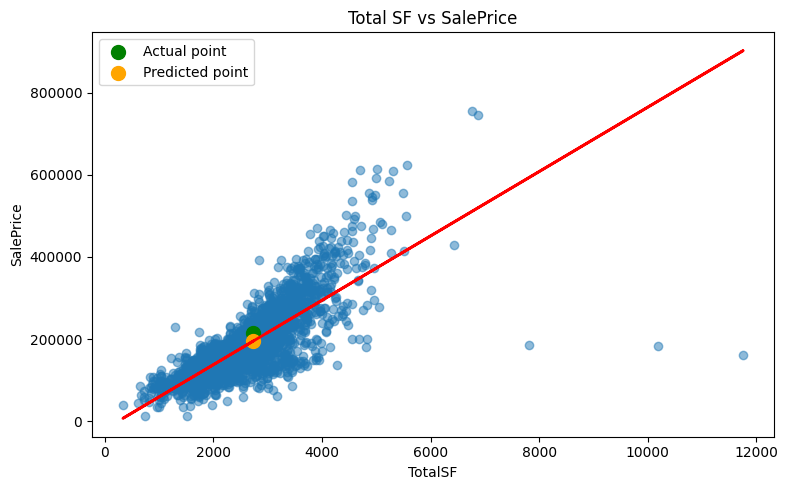


=== Overall Qual vs SalePrice ===
Feature value (Overall Qual): 6
Actual SalePrice: $215,000.00
Predicted SalePrice: $176,502.62


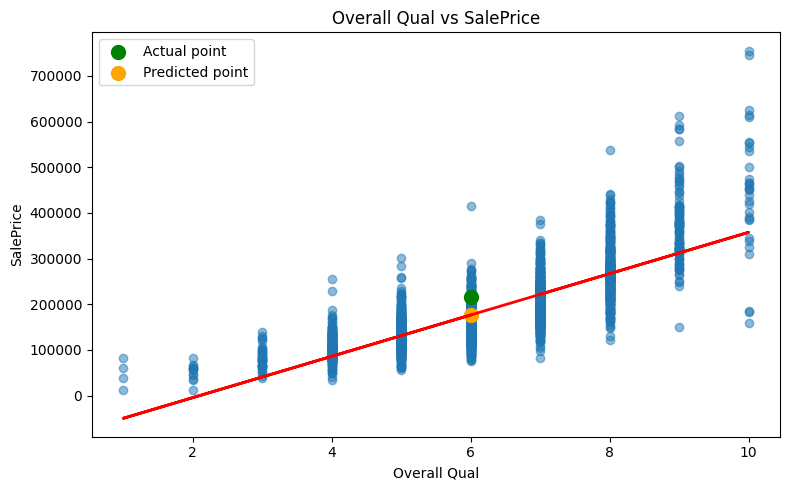

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x_col1 = 'TotalSF'
y_col = 'SalePrice'

data1 = new_df[[x_col1, y_col]].dropna()
X1 = data1[[x_col1]]
y1 = data1[y_col]

model1 = LinearRegression()
model1.fit(X1, y1)

example1 = data1.iloc[0]
x_example1 = example1[x_col1]
y_actual1 = example1[y_col]

x_input1 = pd.DataFrame([[x_example1]], columns=[x_col1])
y_pred1 = model1.predict(x_input1)[0]

print("=== TotalSF vs SalePrice ===")
print(f"Feature value ({x_col1}): {x_example1}")
print(f"Actual SalePrice: ${y_actual1:,.2f}")
print(f"Predicted SalePrice: ${y_pred1:,.2f}")

plt.figure(figsize=(8,5))
plt.scatter(X1, y1, alpha=0.5)
plt.plot(X1, model1.predict(X1), color='red', linewidth=2)
plt.scatter(x_example1, y_actual1, color='green', s=100, label='Actual point')
plt.scatter(x_example1, y_pred1, color='orange', s=100, label='Predicted point')
plt.title(f"Total SF vs SalePrice")
plt.xlabel(x_col1)
plt.ylabel(y_col)
plt.legend()
plt.tight_layout()
plt.show()


x_col2 = 'Overall Qual'
data2 = df[[x_col2, y_col]].dropna()
X2 = data2[[x_col2]]
y2 = data2[y_col]

model2 = LinearRegression()
model2.fit(X2, y2)

example2 = data2.iloc[0]
x_example2 = example2[x_col2]
y_actual2 = example2[y_col]

x_input2 = pd.DataFrame([[x_example2]], columns=[x_col2])
y_pred2 = model2.predict(x_input2)[0]

print("\n=== Overall Qual vs SalePrice ===")
print(f"Feature value ({x_col2}): {x_example2}")
print(f"Actual SalePrice: ${y_actual2:,.2f}")
print(f"Predicted SalePrice: ${y_pred2:,.2f}")

plt.figure(figsize=(8,5))
plt.scatter(X2, y2, alpha=0.5)
plt.plot(X2, model2.predict(X2), color='red', linewidth=2)
plt.scatter(x_example2, y_actual2, color='green', s=100, label='Actual point')
plt.scatter(x_example2, y_pred2, color='orange', s=100, label='Predicted point')
plt.title(f"Overall Qual vs SalePrice")
plt.xlabel(x_col2)
plt.ylabel(y_col)
plt.legend()
plt.tight_layout()
plt.show()
